# Logistic regression and loss function

Test whether logistic regression with minimizing true negative can train data well or not.

## Data preparation

2D-Normal with eye-covariance and (0, 3) and (2, 1) mean.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cov = np.eye(2) * 0.5
label_0 = np.random.multivariate_normal([0, 3], cov, 30)
label_1 = np.random.multivariate_normal([2, 1], cov, 30)
data = np.concatenate([label_0, label_1], axis=0).T
label = np.array([0] * 30 + [1] * 30)

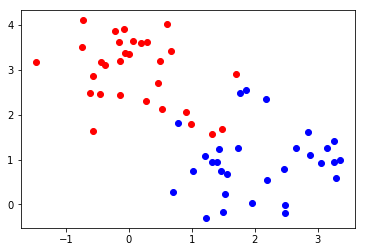

In [3]:
plt.plot(label_0.T[0], label_0.T[1], 'ro')
plt.plot(label_1.T[0], label_1.T[1], 'bo')

## Model definition

Define logistic regression model with training mode.

In [4]:
class Logistic:
    def __init__(self, size=2, mode='true_negative'):
        self.mode = mode
        self.weight = np.random.randn(size, 1)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, data):
        return self.sigmoid(self.weight.T @ data)

    def inference(self, data):
        return self.forward(data) > 0.5

    def derivative(self, data, label):
        if self.mode == 'true_negative':
            return data @ (1 - label - self.forward(data)).T
        elif self.mode == 'true_positive':
            return data @ (label - self.forward(data)).T

    def update(self, data, label, learning_rate):
        self.weight = self.weight + learning_rate * self.derivative(data, label)
        return self.weight

    def train(self, epochs, lr, threshold, data, label):
        prev_weight = self.weight
        for i in range(epochs):
            weight = self.update(data, label, lr)
            if np.mean(np.abs(prev_weight - weight)) < threshold:
                break

## 1. Maximizing true positive

Train model with maximizing true positive.

In [5]:
model = Logistic(mode='true_positive')
model.train(10000, 1e-2, 1e-2, data, label)

In [6]:
domain = np.linspace(0, 2, 800)
boundary = -model.weight[0] / model.weight[1] * domain

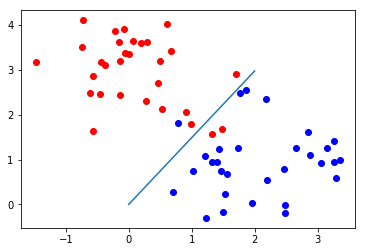

In [7]:
plt.plot(label_0.T[0], label_0.T[1], 'ro')
plt.plot(label_1.T[0], label_1.T[1], 'bo')
plt.plot(domain, boundary)

## 2. Minimizing true negative

Train model with minimizing true negative.

In [8]:
model = Logistic(mode='true_negative')
model.train(100000, 1e-2, 1e-2, data, label)

In [9]:
domain = np.linspace(0, 2, 800)
boundary = -model.weight[0] / model.weight[1] * domain

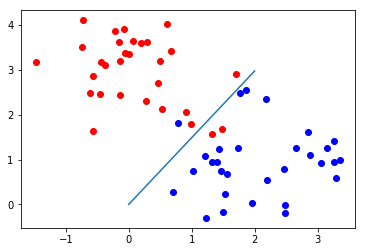

In [10]:
plt.plot(label_0.T[0], label_0.T[1], 'ro')
plt.plot(label_1.T[0], label_1.T[1], 'bo')
plt.plot(domain, boundary)

## 3. Conclusion

Two objectives are same and both can classify data well.